In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 15

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "new_data",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

def get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10):
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)
    
    train_size = int(len(dataset) * train_split)
    val_size = int(len(dataset) * val_split)

    train_ds = dataset.take(train_size)
    test_ds = dataset.skip(train_size)
    val_ds = test_ds.take(val_size)
    test_ds = test_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)



2024-06-10 20:55:25.523749: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-10 20:55:25.601044: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-10 20:55:26.015227: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 20:55:27.895479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 3314 files belonging to 2 classes.


In [2]:
# Preprocessing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])



In [3]:
# Define a simple CNN model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])



/home/dheeraj/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)



In [5]:
history = model.fit(
    train_ds,
    epochs=15,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)



Epoch 1/15


2024-06-10 20:55:32.257077: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.
2024-06-10 20:55:32.303605: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.
2024-06-10 20:55:32.441486: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.
2024-06-10 20:55:32.497220: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.
2024-06-10 20:55:32.554540: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.


83/83 ━━━━━━━━━━━━━━━━━━━━ 391s 5s/step - accuracy: 0.7112 - loss: 1.0475 - val_accuracy: 0.9187 - val_loss: 0.1800
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 374s 4s/step - accuracy: 0.9115 - loss: 0.2027 - val_accuracy: 0.9594 - val_loss: 0.0989
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.9326 - loss: 0.1726 - val_accuracy: 0.9594 - val_loss: 0.1081
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 481s 6s/step - accuracy: 0.9573 - loss: 0.1146 - val_accuracy: 0.9563 - val_loss: 0.1216
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 421s 5s/step - accuracy: 0.9550 - loss: 0.1068 - val_accuracy: 0.9750 - val_loss: 0.0781
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 404s 5s/step - accuracy: 0.9724 - loss: 0.0820 - val_accuracy: 0.9750 - val_loss: 0.0593
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 405s 5s/step - accuracy: 0.9636 - loss: 0.0953 - val_accuracy: 0.9812 - val_loss: 0.0456
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 393s 5s/step - accuracy: 0.9725 - loss: 0.0769 - val_accuracy: 0.9844 - val_loss: 0.

2024-06-10 22:17:05.774745: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 8 of 10
2024-06-10 22:17:08.117542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


83/83 ━━━━━━━━━━━━━━━━━━━━ 516s 5s/step - accuracy: 0.9830 - loss: 0.0470 - val_accuracy: 0.9563 - val_loss: 0.1156
Epoch 14/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 421s 5s/step - accuracy: 0.9802 - loss: 0.0465 - val_accuracy: 0.9812 - val_loss: 0.0418
Epoch 15/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 411s 5s/step - accuracy: 0.9848 - loss: 0.0494 - val_accuracy: 0.9906 - val_loss: 0.0266


In [6]:
scores = model.evaluate(test_ds)

import os

# Create the directory if it doesn't exist


11/11 ━━━━━━━━━━━━━━━━━━━━ 68s 802ms/step - accuracy: 0.9854 - loss: 0.0410


In [7]:
# Create the directory if it doesn't exist
save_dir = "../saved_models"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Determine the next model version
model_version = max([int(i) for i in os.listdir(save_dir) if i.isdigit()] + [0]) + 1

# Save the model with .keras extension
model.save(f"{save_dir}/{model_version}.keras")

In [8]:
# Save the model in Keras format
model.save('my_model.keras')


In [9]:
# # Save the model in TensorFlow SavedModel format
# model.save('saved_model/my_model')


In [14]:
# # # Save the model in H5 format
# # model.save('my_model.h5')
#  #Create the directory if it doesn't exist
# save_dir = "../saved_models"
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# # Determine the next model version
# model_version = max([int(i) for i in os.listdir(save_dir) if i.isdigit()] + [0]) + 1

# # Save the model with .keras extension
# model.save(f"{save_dir}/{model_version}")

In [16]:
# # Create the directory if it doesn't exist
# save_dir = "../saved_models"
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# # Determine the next model version
# model_version = max([int(i) for i in os.listdir(save_dir) if i.isdigit()] + [0]) + 1

# # Save the model with .keras extension
# model.save(f"{save_dir}/{model_version}.h5")

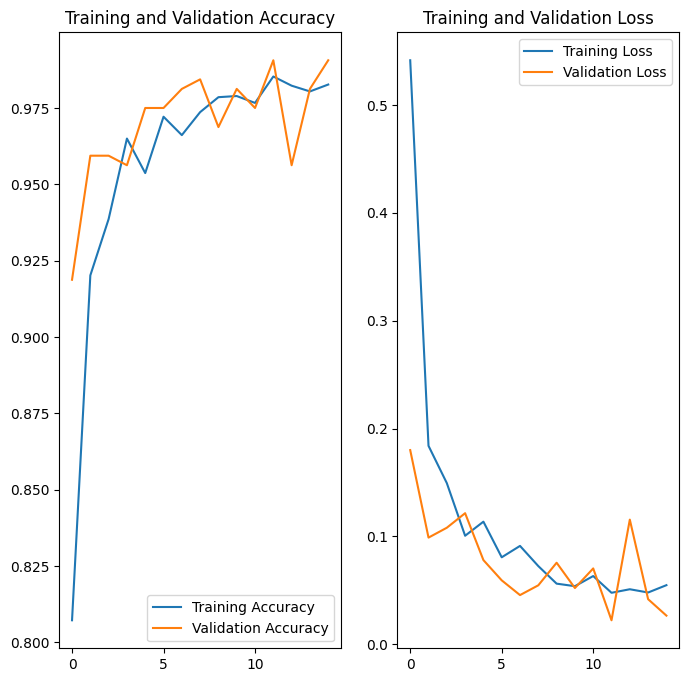

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
Accuracy: 0.985207100591716
F1 Score: 0.9852232651096058


2024-06-10 22:45:49.900779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Plot accuracy and loss curves
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(EPOCHS)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_accuracy_and_loss(history)

# Calculate accuracy and F1 score
def evaluate_model(model, test_ds):
    y_true = []
    y_pred = []

    for images, labels in test_ds:
        predictions = model.predict(images)
        predicted_labels = np.argmax(predictions, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted_labels)

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, f1

accuracy, f1 = evaluate_model(model, test_ds)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')


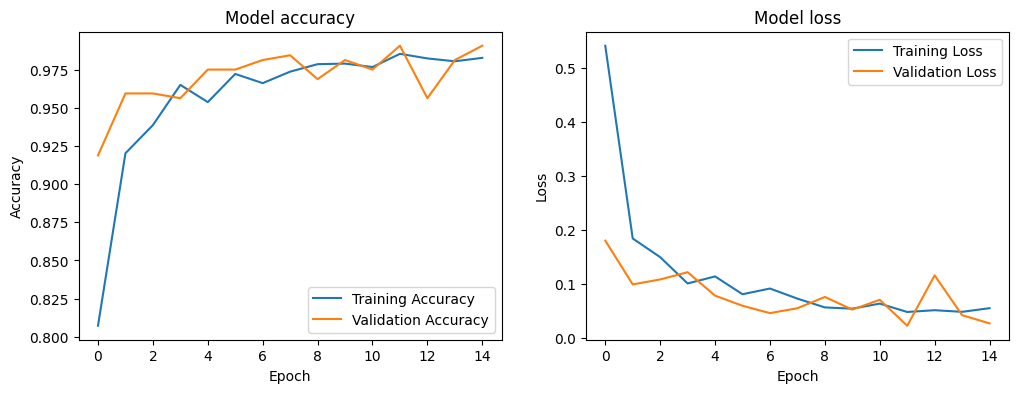

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step


2024-06-10 22:47:15.590320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/dheeraj/.local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


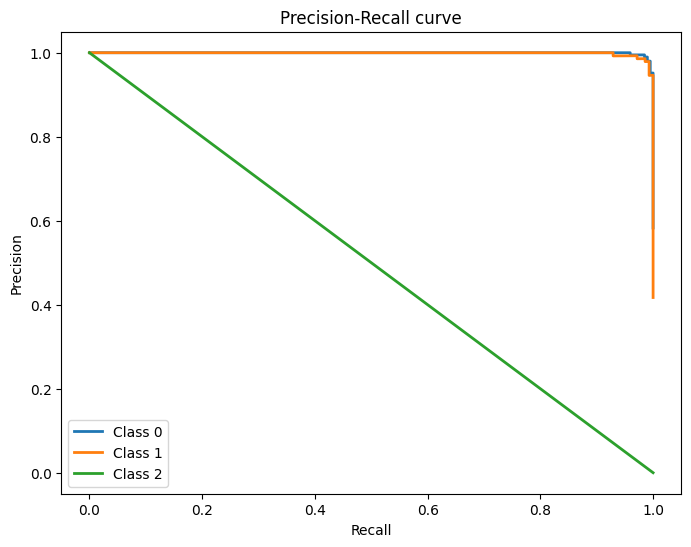

2024-06-10 22:48:23.248631: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 9 of 10
2024-06-10 22:48:24.280351: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2024-06-10 22:49:44.017900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


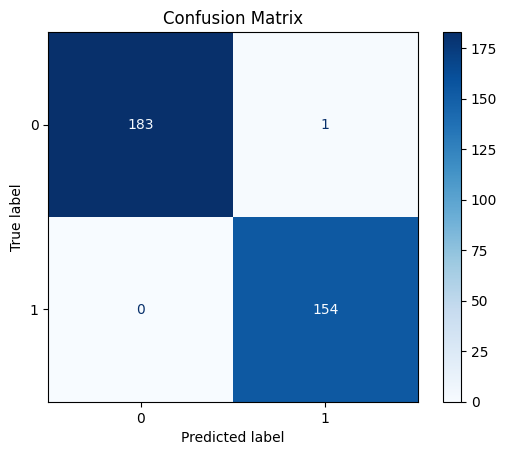

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Model Learning Curve
def plot_learning_curve(history):
    epochs_range = range(len(history.history['loss']))

    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

plot_learning_curve(history)

# Precision-Recall Curve
def plot_precision_recall_curve(model, test_ds):
    y_true = []
    y_scores = []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_true.extend(labels.numpy())
        y_scores.extend(predictions)

    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, y_scores[:, i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='best')
    plt.show()

plot_precision_recall_curve(model, test_ds)

# Confusion Matrix
def plot_confusion_matrix(model, test_ds):
    y_true = []
    y_pred = []

    for images, labels in test_ds:
        predictions = model.predict(images)
        predicted_labels = np.argmax(predictions, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted_labels)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(model, test_ds)


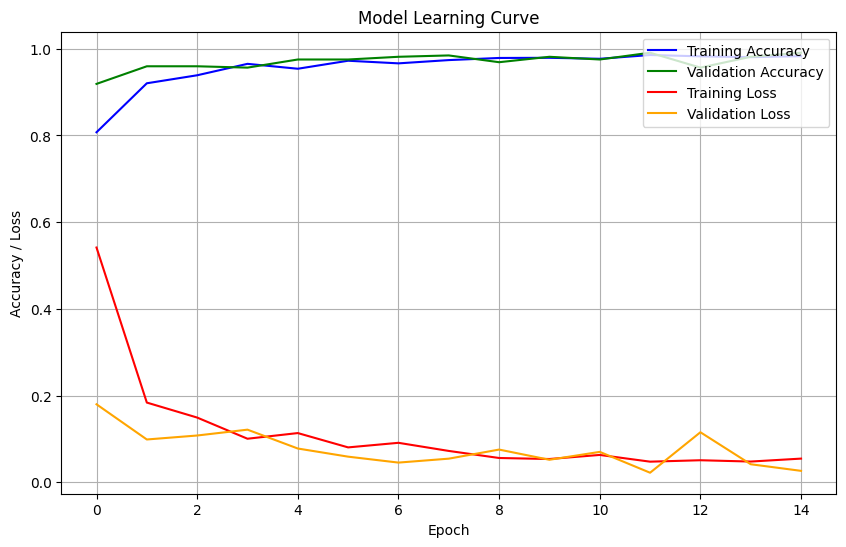

In [22]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    plt.figure(figsize=(10, 6))

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')

    # Plot training & validation loss values
    plt.plot(history.history['loss'], label='Training Loss', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

    plt.title('Model Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Call the function with your model's training history
plot_learning_curve(history)


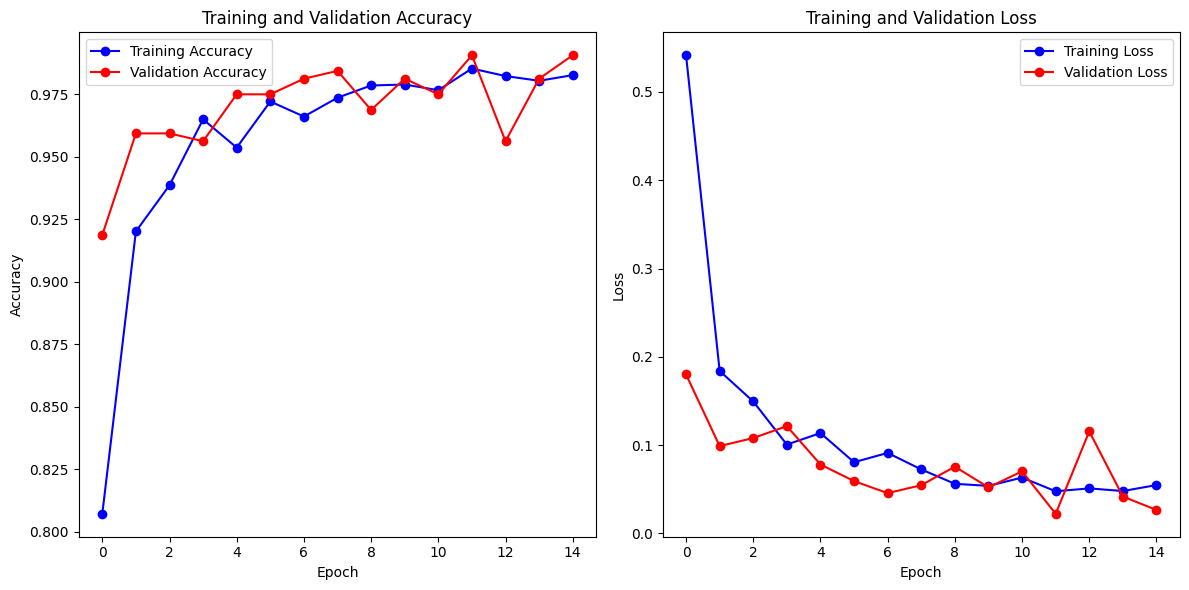

In [24]:
# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
